[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Traffic-Sign-Classifier-Project/blob/master/Udacity_Term_1_Traffic_Sign_Classifier.ipynb)

# **Self-Driving Car Engineer Nanodegree**

## Project: Build a Traffic Sign Recognition Classifier


### Download data and Unzip

In [50]:
#Download German Traffic Data Set

!echo log > log.txt
!rm -rf *.p *.zip *.csv internet_images >> log.txt 2>&1
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip >>log.txt 2>&1
!wget https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv >>log.txt 2>&1
!wget https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/internet_images.zip >>log.txt 2>&1

!unzip traffic-signs-data.zip >>log.txt 2>&1
!unzip internet_images.zip >>log.txt 2>&1

!ls
!ls internet_images

datalab		     log.txt	    traffic-signs-data.zip
internet_images      signnames.csv  train.p
internet_images.zip  test.p	    valid.p
00.jpg	01.jpg	02.jpg	03.jpg	04.jpg	05.jpg	06.jpg	07.jpg	08.jpg	09.jpg


### Load and Prepare Data

In [51]:
import pickle
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


training_file   = 'train.p' 
validation_file = 'valid.p' 
testing_file    = 'test.p'

print('training file name = ', training_file)
print('validation file name = ', validation_file)
print('testing file name = ', testing_file)


#Load Data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#Extract Constants

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train[0].shape

n_classes = len(np.unique(y_test))

print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of X_valid =", X_valid.shape)

print("Shape of Y_train =", y_train.shape)
print("Shape of Y_test =", y_test.shape)
print("Shape of Y_valid =", y_valid.shape)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


#Convert labels to one hot.
y_train_one_hot = to_categorical(y_train, n_classes)
y_valid_one_hot = to_categorical(y_valid, n_classes)
y_test_one_hot = to_categorical(y_test, n_classes)


print("Shape of y_train_one_hot =", y_train_one_hot.shape)
print("Shape of y_valid_one_hot =", y_valid_one_hot.shape)
print("Shape of y_test_one_hot =", y_test_one_hot.shape)


training file name =  train.p
validation file name =  valid.p
testing file name =  test.p
Shape of X_train = (34799, 32, 32, 3)
Shape of X_test = (12630, 32, 32, 3)
Shape of X_valid = (4410, 32, 32, 3)
Shape of Y_train = (34799,)
Shape of Y_test = (12630,)
Shape of Y_valid = (4410,)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Shape of y_train_one_hot = (34799, 43)
Shape of y_valid_one_hot = (4410, 43)
Shape of y_test_one_hot = (12630, 43)


### Analyze Data

In [62]:
# Check the valuse of the images channels 


print(X_train[1,1,1,:])
print(y_train[1])
print(y_train_one_hot[1])

[27 24 24]
41
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


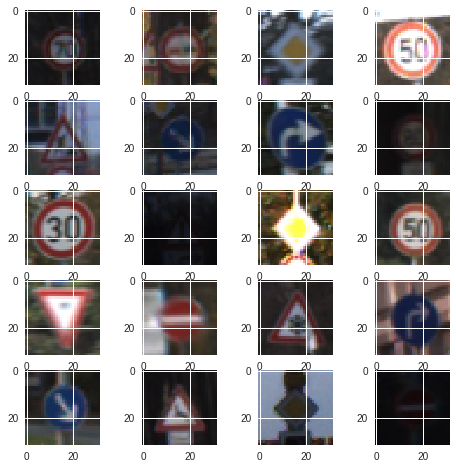

In [52]:
# view random samples 

fig=plt.figure(figsize=(8, 8))
columns,rows = 4,5
for i in range(1,columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(X_train[np.random.randint(n_train)])

(array([2640., 1680., 2250., 1350.,  900.,  930.,  480.,  690.,  690.,
        1020.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

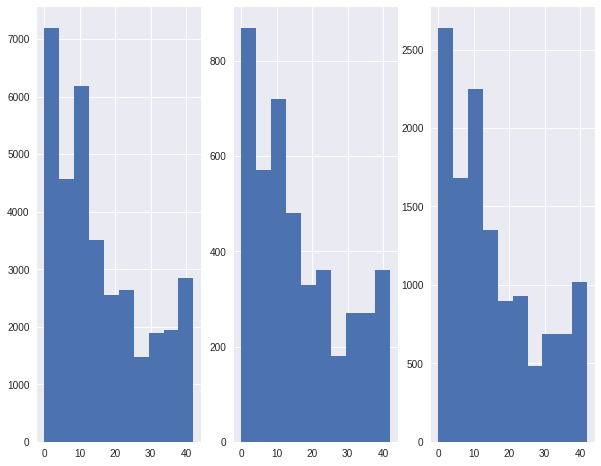

In [53]:
#Analyze distribution of the Images per class


fig=plt.figure(figsize=(10, 8))
columns,rows = 3,1
fig.add_subplot(rows, columns, 1)
plt.hist(y_train)
fig.add_subplot(rows, columns, 2)
plt.hist(y_valid)
fig.add_subplot(rows, columns, 3)
plt.hist(y_test)

### Build, Train and Evaluate Model 


#####################################################################
 Model Summary
#####################################################################
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)       

34799/34799 [==============================] - 4s 107us/step - loss: 7.2512 - acc: 0.1853 - val_loss: 1.6792 - val_acc: 0.5975
Epoch 2/20
34799/34799 [==============================] - 3s 94us/step - loss: 1.3741 - acc: 0.6234 - val_loss: 0.7153 - val_acc: 0.8388
Epoch 3/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.6808 - acc: 0.8052 - val_loss: 0.4708 - val_acc: 0.9009
Epoch 4/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.4266 - acc: 0.8763 - val_loss: 0.3998 - val_acc: 0.9061
Epoch 5/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.3207 - acc: 0.9115 - val_loss: 0.3105 - val_acc: 0.9415
Epoch 6/20
15616/34799 [============>.................] - ETA: 1s - loss: 0.2409 - acc: 0.9315

34799/34799 [==============================] - 3s 95us/step - loss: 0.2306 - acc: 0.9354 - val_loss: 0.2844 - val_acc: 0.9435
Epoch 7/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.1942 - acc: 0.9466 - val_loss: 0.2644 - val_acc: 0.9522
Epoch 8/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.1680 - acc: 0.9549 - val_loss: 0.2725 - val_acc: 0.9535
Epoch 9/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.1462 - acc: 0.9610 - val_loss: 0.2710 - val_acc: 0.9519
Epoch 10/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.1309 - acc: 0.9652 - val_loss: 0.2410 - val_acc: 0.9626
Epoch 11/20
14592/34799 [===========>..................] - ETA: 1s - loss: 0.1225 - acc: 0.9691

34799/34799 [==============================] - 3s 94us/step - loss: 0.1150 - acc: 0.9705 - val_loss: 0.2789 - val_acc: 0.9517
Epoch 12/20
34799/34799 [==============================] - 3s 96us/step - loss: 0.1022 - acc: 0.9741 - val_loss: 0.3096 - val_acc: 0.9481
Epoch 13/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.1058 - acc: 0.9728 - val_loss: 0.2980 - val_acc: 0.9472
Epoch 14/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.0890 - acc: 0.9776 - val_loss: 0.2672 - val_acc: 0.9567
Epoch 15/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0781 - acc: 0.9801 - val_loss: 0.2435 - val_acc: 0.9599
Epoch 16/20
12544/34799 [=========>....................] - ETA: 2s - loss: 0.0795 - acc: 0.9798

34799/34799 [==============================] - 3s 94us/step - loss: 0.0912 - acc: 0.9777 - val_loss: 0.2517 - val_acc: 0.9596
Epoch 17/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.0685 - acc: 0.9827 - val_loss: 0.2628 - val_acc: 0.9569
Epoch 18/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.0636 - acc: 0.9838 - val_loss: 0.2413 - val_acc: 0.9601
Epoch 19/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.0599 - acc: 0.9847 - val_loss: 0.2858 - val_acc: 0.9551
Epoch 20/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.0650 - acc: 0.9834 - val_loss: 0.2330 - val_acc: 0.9642

#####################################################################
 Training History
#####################################################################
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[1.6792072247485725, 0.7153483306875035, 0.4707685387729247, 0.39981791560882346, 0.3105354352615554, 0.284351685

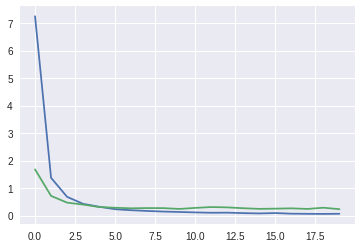


#####################################################################
 Evaluating Model
#####################################################################
12630/12630 [==============================] - 1s 100us/step

#####################################################################
Test loss: 0.26402492521029225
Test accuracy: 0.9523357086491226
#####################################################################


In [54]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adadelta


def LeNet(input_shape,classes, weights_path=None) :
  
  model = Sequential()

  #Layer 1 
  model.add(Conv2D(32, (5, 5), padding="valid",input_shape=input_shape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Layer 2
  model.add(Conv2D(64, (5, 5), padding="valid"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  #Layer 3
  model.add(Dense(800))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  
  #Layer 4
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))

  #Layer 5
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  
  return model

model = LeNet(image_shape,n_classes)

print()
print('#####################################################################')
print(' Model Summary')
print('#####################################################################')


model.summary()


model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

print()
print('#####################################################################')
print(' Training Model')
print('#####################################################################')


batch_size = 256 
epochs = 20 

print('batch_size ' + str(batch_size))
print('epochs ' + str(epochs))

history = model.fit(X_train, y_train_one_hot,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_valid, y_valid_one_hot))


print()
print('#####################################################################')
print(' Training History')
print('#####################################################################')


print(history.history.keys())
print(history.history['val_loss'])


train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.show()


print()
print('#####################################################################')
print(' Evaluating Model')
print('#####################################################################')


score = model.evaluate(X_test, y_test_one_hot, verbose=1)


print()
print('#####################################################################')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('#####################################################################')


### Predictions

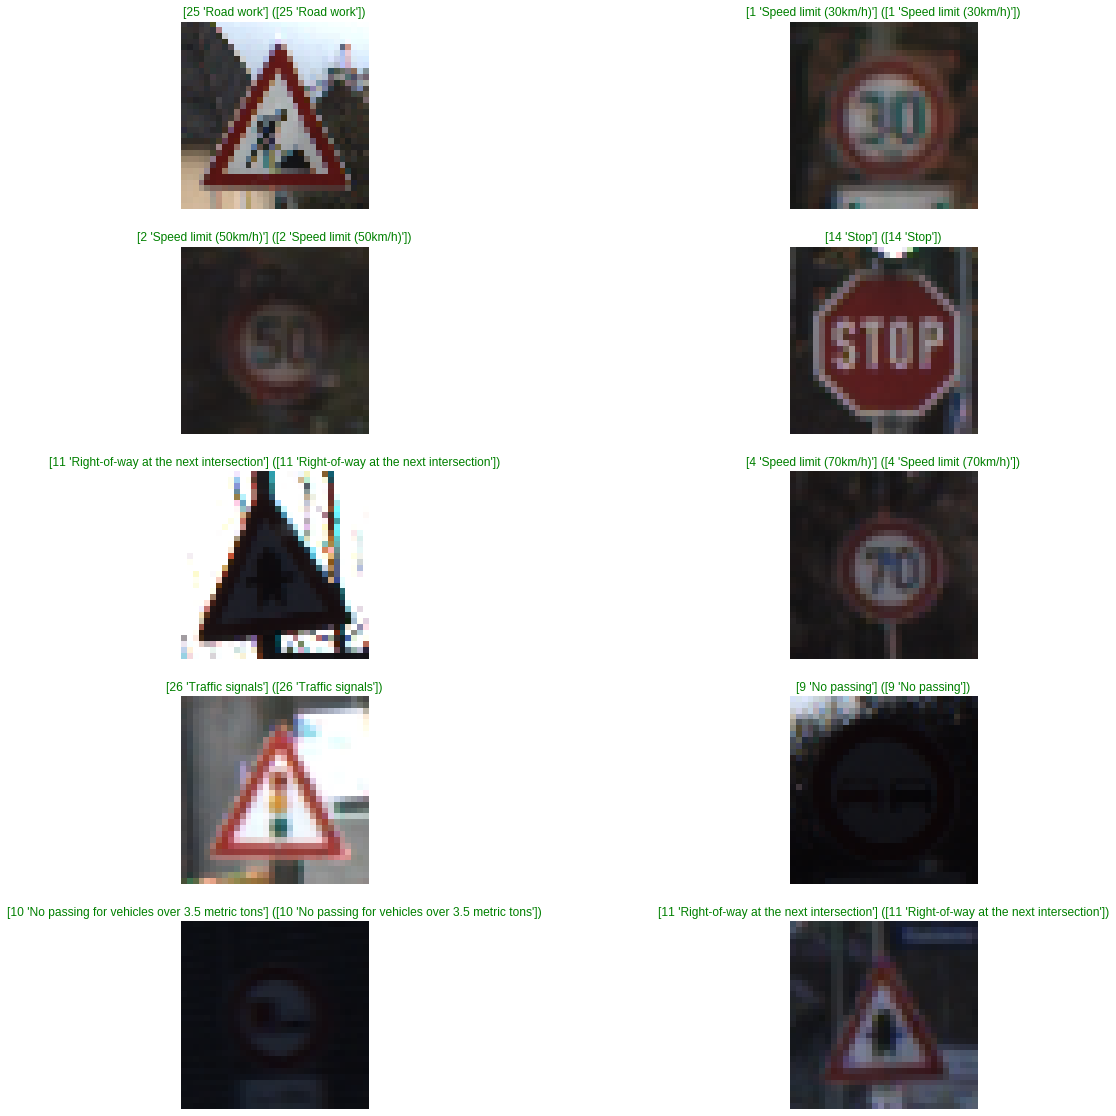

In [31]:
# View Predictions for random test images 

from pandas import read_csv
german_traffic_signs = read_csv('signnames.csv').values

y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_one_hot[index])
    # Set the title for each image
    #ax.set_title("{} ({})".format(predict_index,true_index))
    
    ax.set_title("{} ({})".format(german_traffic_signs[predict_index], 
                                  german_traffic_signs[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


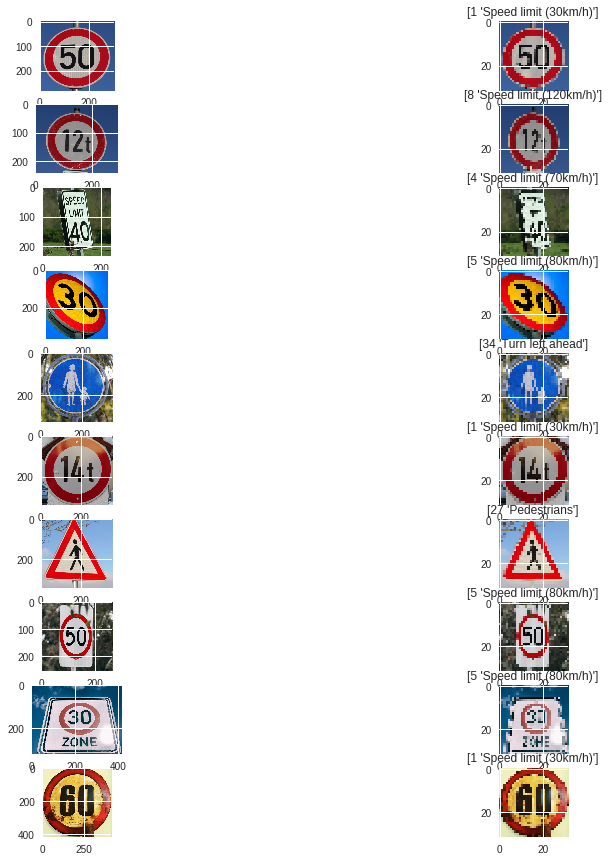

In [72]:

from skimage.io import imread_collection
from skimage.transform import resize

raw_images = imread_collection('internet_images/*')

figure = plt.figure(figsize=(15, 15))
i=0
row=len(raw_images)
col=2

for raw_image in raw_images :
  
    image = resize(raw_image,(32,32,3))
    x = np.asarray( image, dtype="int32" )
    x = image.reshape(1,x.shape[0],x.shape[1],x.shape[2])
    x = x*255
    
    #print(x.shape)
    #print(x[0,1,1,:])

    y_hat = model.predict(x)

    
    predict_index = np.argmax(y_hat[0])
    
    i=i+1
    ax = figure.add_subplot(row, col, i)
    ax.imshow(raw_image)

    i=i+1
    ax = figure.add_subplot(row, col, i)
    ax.set_title("{}".format(german_traffic_signs[predict_index]))
    ax.imshow(image)
    



